<a href="https://colab.research.google.com/github/SultanaNawaz1460/Machine-Learning/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No. of Digits after decimal points to be retained (0-9): 5
The Signal to Quantization Noise Ratio is: 107.78 dB.


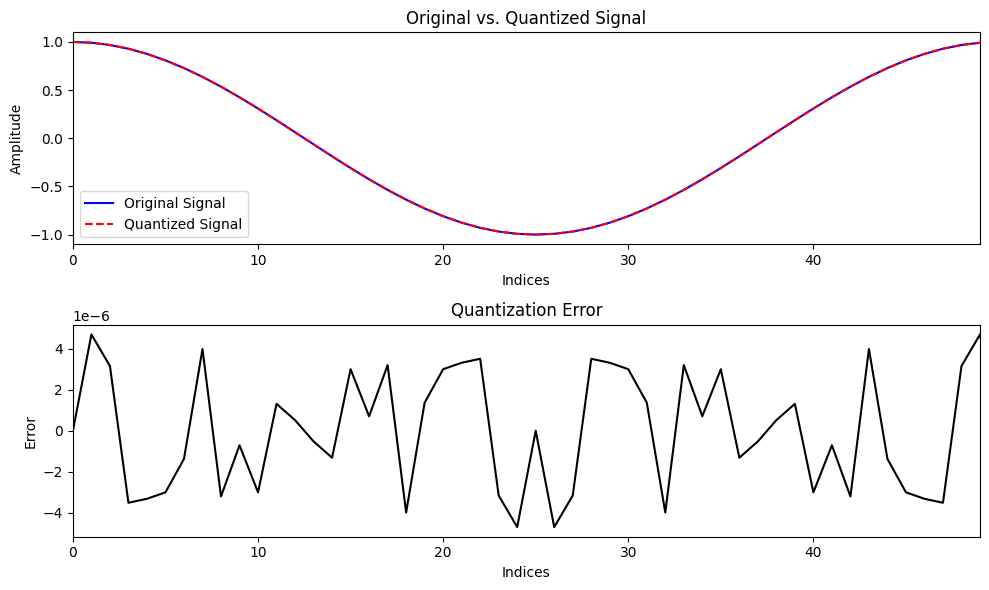

In [2]:
#Task 1:
#1. Simulate a DTCV sinusoid of 1/50 cycles/sample with length of the signal be 500.
# 2. Choose the no. of significant digits for round-off and apply to the signal generated
# 3. Compute the error signals and SQNR
# 4. Explore and comment on the change and error rate when you choose different round off.
#CODE
import numpy as np
import matplotlib.pyplot as plt
# Parameters
fd1 = 1 / 50
n = np.arange(500) # Discrete indices
x1 = np.cos(2 * np.pi * fd1 * n) # Original signal
# Input for quantization
q = int(input('No. of Digits after decimal points to be retained (0-9): '))
# Quantization
x1q = np.round(x1 * 10**q) / 10**q # Quantized signal
x1e = x1 - x1q # Quantization error
# Power calculations
Px1 = np.sum(np.abs(x1)**2) / len(x1) # Power of original signal
Pe1 = np.sum(np.abs(x1e)**2) / len(x1e) # Power of error
SQNR = 10 * np.log10(Px1 / Pe1) # Signal-to-Quantization Noise Ratio
# Display SQNR
print(f'The Signal to Quantization Noise Ratio is: {SQNR:.2f} dB.')
# Plotting
plt.figure(figsize=(10, 6))
# Original vs Quantized Signal
plt.subplot(2, 1, 1)
plt.plot(n, x1, label='Original Signal', color='blue')
plt.plot(n, x1q, label='Quantized Signal', linestyle='--', color='red')
plt.xlabel('Indices')
plt.ylabel('Amplitude')
plt.xlim(0, 49)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title('Original vs. Quantized Signal')
# Quantization Error
plt.subplot(2, 1, 2)
plt.plot(n, x1e, label='Error', color='black')
plt.xlabel('Indices')
plt.ylabel('Error')
plt.xlim(0, 49)
plt.title('Quantization Error')
plt.tight_layout()
plt.show()

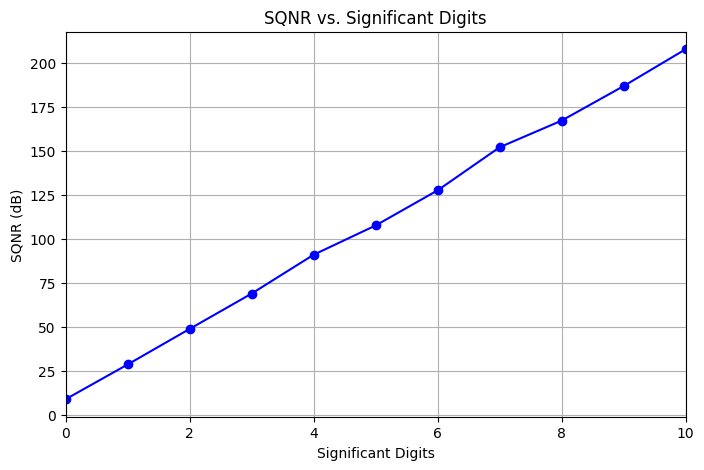

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# Parameters
fd1 = 1 / 50 # Frequency of the cosine signal
n = np.arange(500) # Discrete indices (0 to 499)
q = np.arange(11) # Significant digits (0 to 10)
# Preallocate SQNR array
SQNR = np.zeros(len(q))
# Loop through each quantization level
for num in range(len(q)):
 x1 = np.cos(2 * np.pi * fd1 * n) # Original cosine signal
 Px1 = np.sum(np.abs(x1)**2) / len(x1) # Power of the original signal
 x1q = np.round(x1 * 10**q[num]) / 10**q[num] # Quantized signal
 x1e = x1 - x1q # Quantization error
 Pe1 = np.sum(np.abs(x1e)**2) / len(x1e)
 SQNR[num] = 10 * np.log10(Px1 / Pe1) # Signal-to-Quantization Noise Ratio
# Plot SQNR vs. Significant Digits
plt.figure(figsize=(8, 5))
plt.plot(q, SQNR, marker='o', color='blue')
plt.xlabel('Significant Digits')
plt.ylabel('SQNR (dB)')
plt.title('SQNR vs. Significant Digits')
plt.xlim(q[0], q[-1])
plt.grid(True)
plt.show()

Enter the desired number of significant digits: 4
SQNR (Round): 16.21 dB
SQNR (Floor): 4.69 dB
SQNR (Ceil): 4.70 dB


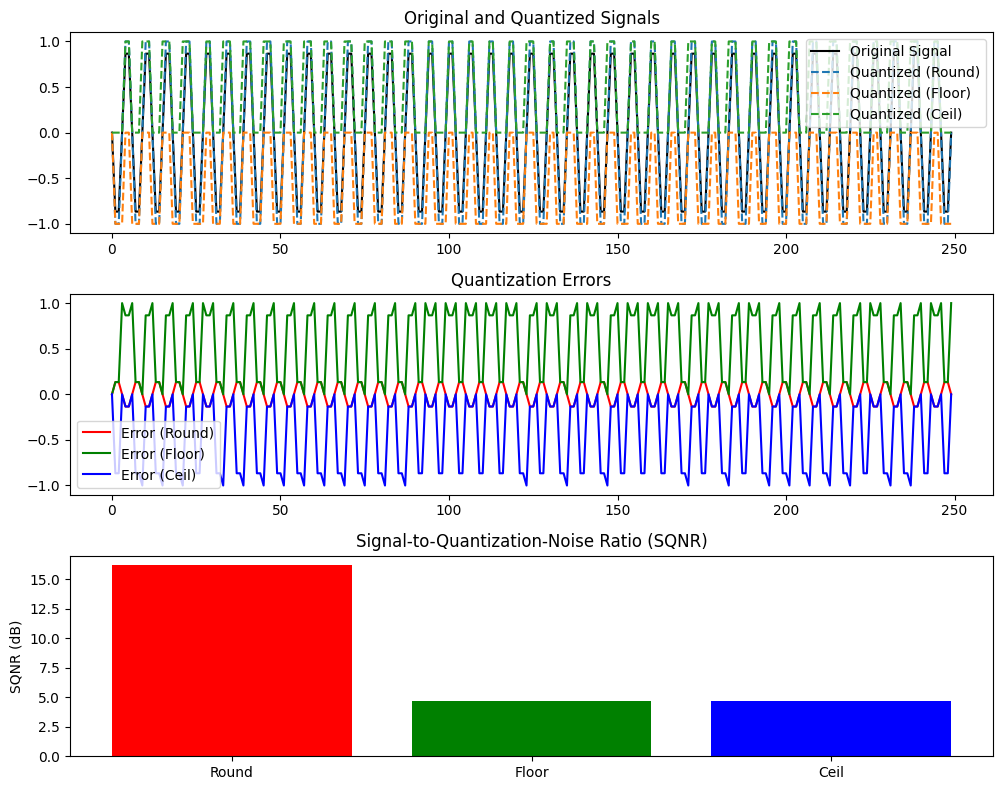

In [9]:
#Lab task-2 :
## ("Effects of Quantization with variable precision levels: Simulate a DTCV sampled composite signal of
#𝑓1=125 samples/sec and 𝑓2=150 samples/sec with length of the signal be 250 samples. Take the desired number of significant digits from user as an input. Then choose the method of
#Quantization (round-off, floor & ceil) and apply to the signal generated above. Compute the quantization error
#signals and SQNR")

# CODE
import numpy as np
import matplotlib.pyplot as plt
# Parameters
f_d1 = 125 # frequency 1 in samples/sec
f_d2 = 150 # frequency 2 in samples/sec
N = 250 # signal length in samples
Fs = max(f_d1, f_d2) # sampling rate
A1, A2 = 1, 1 # Amplitudes of the two components
# Generate the composite signal
n = np.arange(N)
s = A1 * np.sin(2 * np.pi * f_d1 * n / Fs) + A2 * np.sin(2 * np.pi * f_d2 * n / Fs)
# Quantization methods
def round_quantize(signal):
    return np.round(signal)
def floor_quantize(signal):
    return np.floor(signal)
def ceil_quantize(signal):
     return np.ceil(signal)
# Ask user for the desired number of significant digits
num_digits = int(input("Enter the desired number of significant digits: "))
# Quantizing with different methods
quantized_round = round_quantize(s)
quantized_floor = floor_quantize(s)
quantized_ceil = ceil_quantize(s)
# Quantization error signals
error_round = s - quantized_round
error_floor = s - quantized_floor
error_ceil = s - quantized_ceil
# Signal-to-Quantization-Noise Ratio (SQNR) Calculation
def calculate_sqnr(signal, error_signal):
    signal_power = np.var(signal)
    noise_power = np.var(error_signal)
    sqnr = 10 * np.log10(signal_power / noise_power)
    return sqnr
# Compute SQNR for each method
sqnr_round = calculate_sqnr(s, error_round)
sqnr_floor = calculate_sqnr(s, error_floor)
sqnr_ceil = calculate_sqnr(s, error_ceil)
# Display results
print(f"SQNR (Round): {sqnr_round:.2f} dB")
print(f"SQNR (Floor): {sqnr_floor:.2f} dB")
print(f"SQNR (Ceil): {sqnr_ceil:.2f} dB")
# Plot the signals and errors
plt.figure(figsize=(10, 8))
# Plot original and quantized signals
plt.subplot(3, 1, 1)
plt.plot(n, s, label="Original Signal", color='black')
plt.plot(n, quantized_round, label="Quantized (Round)", linestyle='dashed')
plt.plot(n, quantized_floor, label="Quantized (Floor)", linestyle='dashed')
plt.plot(n, quantized_ceil, label="Quantized (Ceil)", linestyle='dashed')
plt.title("Original and Quantized Signals")
plt.legend()
# Plot quantization errors
plt.subplot(3, 1, 2)
plt.plot(n, error_round, label="Error (Round)", color='red')
plt.plot(n, error_floor, label="Error (Floor)", color='green')
plt.plot(n, error_ceil, label="Error (Ceil)", color='blue')
plt.title("Quantization Errors")
plt.legend()
# Plot SQNR values
plt.subplot(3, 1, 3)
plt.bar(["Round", "Floor", "Ceil"], [sqnr_round, sqnr_floor, sqnr_ceil], color=['red', 'green', 'blue'])
plt.title("Signal-to-Quantization-Noise Ratio (SQNR)")
plt.ylabel("SQNR (dB)")
plt.tight_layout()
plt.show()

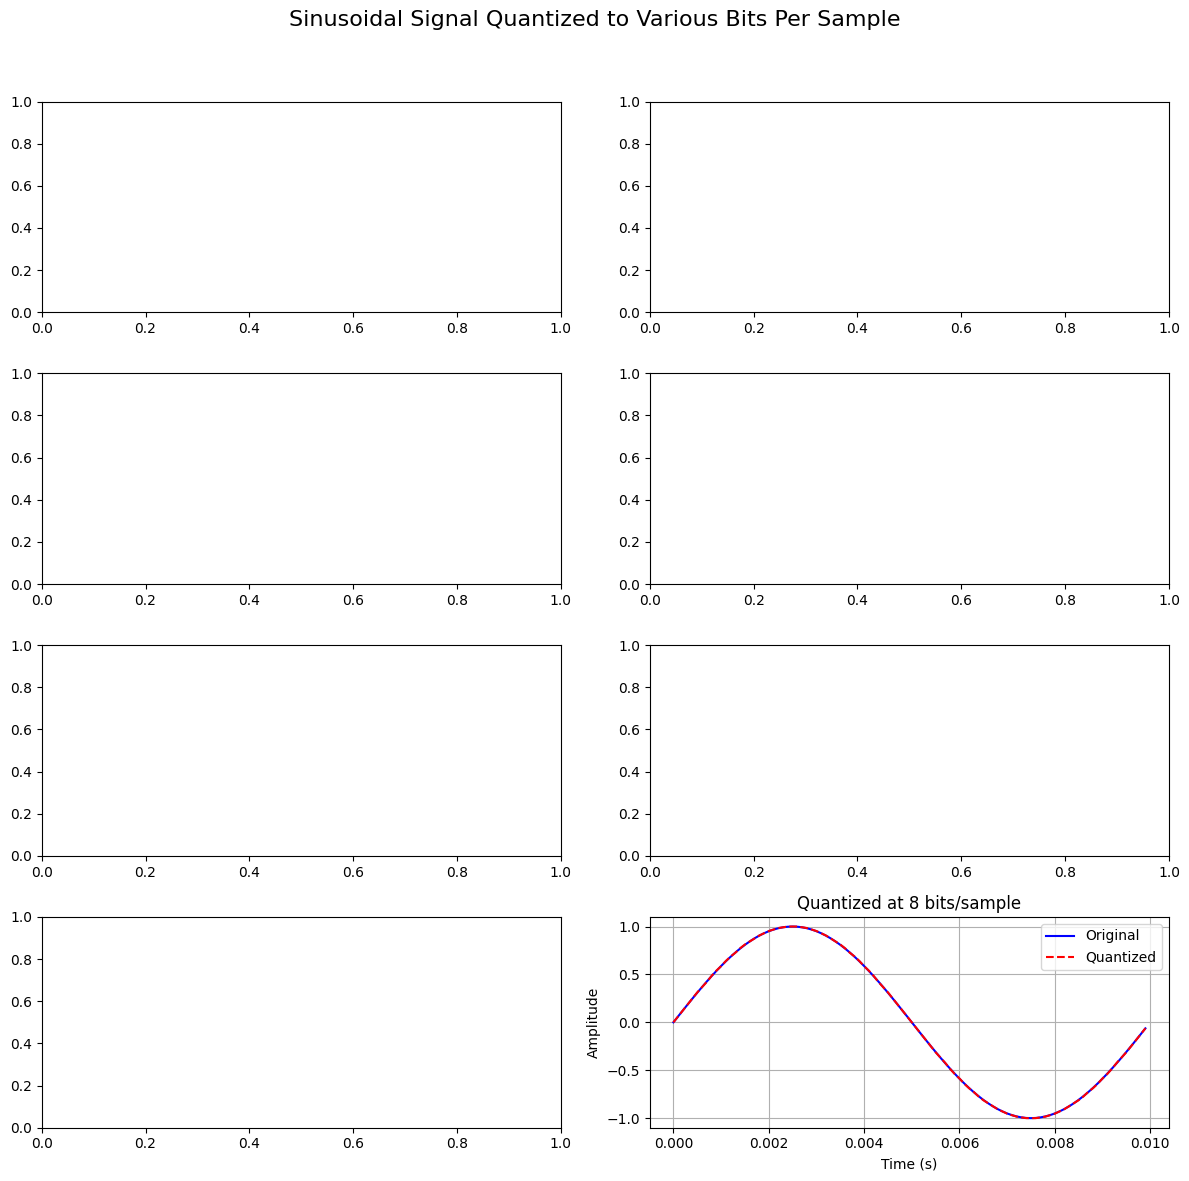

In [17]:
import matplotlib.pyplot as plt
# Signal parameters
Fs = 10000 # Sampling frequency (Hz)
f = 100 # Signal frequency (Hz)
T = 1 # Duration of the signal (seconds)
N = Fs * T # Number of samples
# Generate time vector
t = np.linspace(0, T, N, endpoint=False)
# Generate sinusoidal signal
signal = np.sin(2 * np.pi * f * t)
# Define bit depths
bit_depths = [1, 2, 3, 4, 5, 6, 7, 8]
# Prepare for plotting
num_bits = len(bit_depths)
rows = -(-num_bits // 2) # Two-column layout (ceil division)
# Create a figure for plotting
fig, axes = plt.subplots(rows, 2, figsize=(12, rows * 3))
axes = axes.flatten() # Flatten the 2D array of axes for easy indexing
# Process each bit depth
for i, bits in enumerate(bit_depths):
# Quantization levels and step size
   levels = 2**bits # Number of quantization levels
   q_level = 2 / levels # Quantization step size (range [-1, 1])
# Quantize the signal
quantized_signal = np.round(signal / q_level) * q_level
# Plot the quantized signal (first 100 samples for clarity)
ax = axes[i]
ax.plot(t[:100], signal[:100], 'b', label='Original') # Original signal
ax.plot(t[:100], quantized_signal[:100], 'r--', label='Quantized') # Quantized signal
ax.set_title(f'Quantized at {bits} bits/sample')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.legend()
ax.grid(True)
# Remove unused subplots if any
for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])
# Add a super title for the figure
fig.suptitle('Sinusoidal Signal Quantized to Various Bits Per Sample', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to make space for the super title
plt.show()

In [18]:
#TASK-04:
#Audio signal quantization to various bits per sample Use your recorded voice in
#last session and quantize it at 1 bit /sample. Change bit depth to 2,3,4 and then listen and take notes of your
# observations. Decide no. of bits for audio until quality stops improving.

# CODE

# Install required library
!pip install soundfile
# Import necessary libraries
import numpy as np
import soundfile as sf
import IPython.display as ipd
def quantize_audio(file_path, bit_depth):
# Read the audio file
   data, samplerate = sf.read(file_path)
# Normalize the audio data
   data = data / np.max(np.abs(data))
# Quantization levels
   levels = 2 ** bit_depth
# Quantize
   quantized = np.round(data * (levels / 2 - 1)) / (levels / 2 - 1)
# Save the quantized audio
   output_path = f'quantized_{bit_depth}bit.wav'
   sf.write(output_path, quantized, samplerate)
   return output_path
# Upload your audio file
from google.colab import files
uploaded = files.upload()
# Choose the file name from the uploaded files
file_path = list(uploaded.keys())[0]
# Quantize and play audio for different bit depths
for bits in range(1, 5): # Adjust range as needed
      print(f"\nQuantizing to {bits}-bit depth...")
      output_path = quantize_audio(file_path, bits)
      print(f"Playing {bits}-bit audio:")
      ipd.display(ipd.Audio(output_path))

Saving sample2.wav to sample2 (1).wav

Quantizing to 1-bit depth...
Playing 1-bit audio:


<ipython-input-18-d79f134e1efc>:22: RuntimeWarning: invalid value encountered in divide
  quantized = np.round(data * (levels / 2 - 1)) / (levels / 2 - 1)



Quantizing to 2-bit depth...
Playing 2-bit audio:



Quantizing to 3-bit depth...
Playing 3-bit audio:



Quantizing to 4-bit depth...
Playing 4-bit audio:


In [ ]:
#Conclusion:
# This lab demonstrates the trade-offs between precision, quantization error, and storage. While higher bit depths reduce quantization noise and improve SQNR, practical
#considerations such as processing power and memory constraints must guide ADC selection and system design.